<a href="https://colab.research.google.com/github/Da-Seungheon/mini_project/blob/main/07_%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5_1%ED%8C%80_%EB%B0%B1%EC%8A%B9%ED%97%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석환경 및 데이터 불러오기

In [ ]:
!pip install koreanize_matplotlib

%config lineBackendin.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.6 MB/s eta 0:00:00


In [ ]:
data_path = '/content/drive/MyDrive/DA_6기/스프린트 개인미션/미션07_백승헌/hotel_data_modified.csv'
df = pd.read_csv(data_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03



- 데이터 설명
- 컬럼명 설명
- <mark>hotel : 호텔명 (Resort Hotel 혹은 City Hotel)
- <mark>is_canceled : 호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값
- <mark>lead_time : 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 날짜)
- arrival_date_year	고객의 호텔 도착 연도
- <mark>arrival_date_month : 고객의 호텔 도착 월
- arrival_date_week_number : 고객의 호텔 도착 주 (예시: 2015년도 셋째 주에 도착 → arrival_date_week_number = 3)
- arrival_date_day_of_month	고객의 호텔 도착 일 (예시: 3월 2일에 도착 → arrival_date_day_of_month = 2)
- <mark>stays_in_weekend_nights : 고객이 호텔에 숙박했거나 예약한 주말 밤 수(토요일~일요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_weekend_nights = 2)
- <mark>stays_in_week_nights : 고객이 호텔에 숙박했거나 예약한 주중 밤 수(월요일~금요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_week_nights = 3)
- adults	예약된 어른의 수
- <mark>children : 예약된 어린이의 수
- <mark>babies : 예약된 아기의 수
- <mark>meal	예약된 식사 유형
    - Undefined/SC: 식사 포함되지 않은 옵션
    - BB: Bed & Breakfast 옵션
    - HB: Half board (아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션
    - FB: Full board (아침, 점심, 저녁)
- country	투숙객의 출신 국가. 카테고리는 ISO 3155-3:2013 형식으로 표시 (국가 표기 코드는 ISO 3166 국가 코드 참조)
- market_segment	시장 세그먼트. “TA”는 “Travel Agent”, “TO”는 “Tour Operators”를 의미.
- distribution_channel	예약 유통 채널. “TA”는 “Travel Agent”, “TO”는 “Tour Operators”를 의미.
- <mark>is_repeated_guest : 이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값
- <mark>previous_cancellations : 현재 예약 이전에 고객이 취소한 이전 예약 수
- <mark>previous_bookings_not_canceled : 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수
- reserved_room_type : 예약한 룸 타입 코드
- assigned_room_typp : 배정된 룸 타입 코드. 호텔 운영상의 이유(ex. 초과 예약 등) 또는 고객 요청으로 인해 예약한 객실과 다른 객실 유형이 배정되는 경우가 존재.
booking_changes	예약 시점부터 예약 취소/체크인 시점까지 예약에 대한 변경/수정 횟수
- <mark>agent : 예약을 진행한 여행사의 ID
- <mark>company : 예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID
days_in_waiting_list : 예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수
- <mark>required_car_parking_spaces : 고객이 요구하는 주차 공간 수
- <mark>total_of_special_requests : 고객의 특별 요청 건수 (ex. 트윈 베드, 아기 침대, 고층, 특별한 뷰 등)
- reservation_status	예약의 마지막 상태, 총 3가지 카테고리로 구성
    - <mark>Canceled: 고객이 예약을 취소함
    - <mark>Check-Out: 고객이 체크인을 하고 체크아웃을 함
    - <mark>No-Show: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음.
- <mark>reservations_status_date : 마지막 예약 상태(reservation_status)가 설정된 날짜.

---

# 2. 데이터 정보 분석하기



- 데이터 내용 확인
- 데이터 기초통계
- 데이터 타입
- 데이터 정보
- 결측값 확인

In [ ]:
# agent, children, country의 컬럼에서 결측값이 발견
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
# 결측치 채우기

df['agent'].fillna(0, inplace=True)  #여행사를 사용하지 않고 개인적으로 예약 할 수 있으니 값을 0
df['children'].fillna(0.0, inplace=True)  #최반값 0.0 으로 설정
df['country'].fillna(' none',inplace=True) ## 정확한 나라집계를 위해 none으로 설정
df['company'].fillna(0, inplace=True)  ## 개인적으로 예약할 수 있으니 값을 0

#최종 결측치 확인
df.isna().sum()

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,9.0,0.0,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,9.0,0.0,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,9.0,0.0,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,0.0,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,0.0,0,0,1,Check-Out,2015-07-03


---

# 3. 호텔 취소 및 매출에 관한 가설 세우기

- 호텔 별 취소건수 확인
- 리드타임이 길수록 예약을 취소할 가능성이 높을 것이다
- 방문경험이 있으면 이탈률은 낮을 것이다.
- 특정 국적에서 취소율이 높을 것이다
- 연말 연초에 평소보다 예약이 많을 것이며, 그 만큼 취소건수도 높을 것이다

---

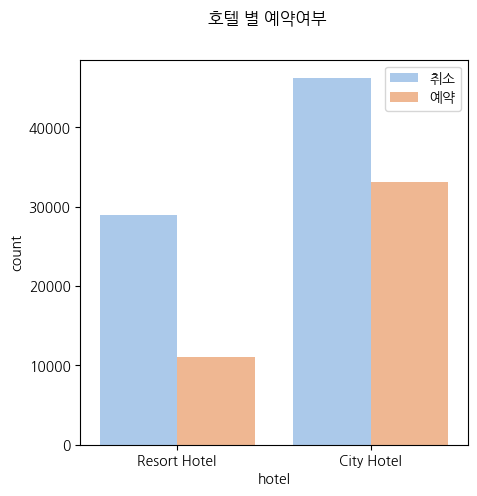

In [ ]:
# 호텔별 예약,취소 여부 시각화
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='pastel')
plt.legend(labels=['취소','예약'])
plt.suptitle('호텔 별 예약여부')
plt.show()

In [ ]:
# 호텔별 취소 비율
df_gp = df.groupby('hotel')['is_canceled'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 2)
df_gp

,count,sum,ratio
hotel,,,
City Hotel,79330,33102,41.73
Resort Hotel,40060,11122,27.76


- city hotel의 취소율은 41.73, resort hotel의 취소율은 27.76
- city hotel가 보다 취소율이 높은 것을 확인

---

## <mark>가설1. 리드타임이 길수록 취소건수가 높을 것이다

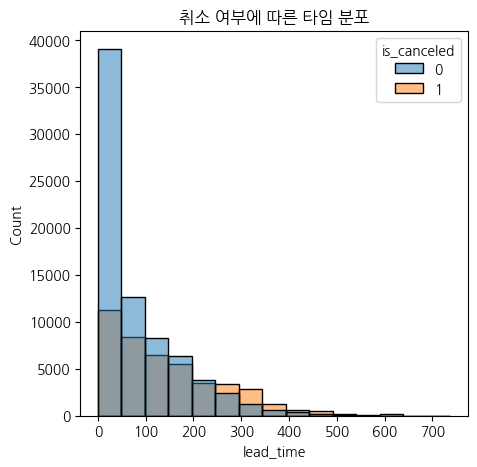

In [ ]:
# 먼저 리드타임이 짧을수록 그 예약 건수는 많을 것으로 확인
# 리드타임을 구간화 하여 구간 별 취소 여부를 확인해보자
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=df, x='lead_time',hue='is_canceled', bins=15)
plt.title('취소 여부에 따른 타임 분포')
plt.show()

In [ ]:
# 리드타임을 구간화 하여 살펴보자
df['ratio'] = np.where(df['lead_time'] <= 10, 1,
              np.where(df['lead_time'] <= 100, 2,
              np.where(df['lead_time'] <= 200, 3,
              np.where(df['lead_time'] <= 300, 4, 5))))

# 호텔별 리드타임 별 취소율
df_gp1 = df.groupby(['hotel','ratio'])['is_canceled'].agg(['count', 'sum'])
df_gp1['ratio'] = round((df_gp1['sum'] / df_gp1['count']) * 100, 2)
df_gp1

count    sum  ratio
hotel        ratio                     
City Hotel   1      12767   1803  14.12
             2      34125  12975  38.02
             3      18121   8797  48.55
             4       8111   4844  59.72
             5       6206   4683  75.46
Resort Hotel 1      10085    763   7.57
             2      15053   4464  29.66
             3       8592   3208  37.34
             4       4649   1960  42.16
             5       1681    727  43.25

- 결과
    - 두 호텔 모두 리드 타임이 길수록 취소율이 높다
    - 리드타임이 가장 짧은 일수에 건수가 가장 많았다
    - 리드타임을 구간화로 측정한 결과
    - 리드타임이 짧을수록 취소 건수가 낮고
    - 리스타임이 길수록 취소 건수가 높은 것을 확인할 수 있다
- 인사이트
    - 예약비용이나, 환불정책을 보다 강조한다면 이를 줄일 수 있을 것으로 보임

---

## 가설2. 방문경험이 있으면 이탈률이 낮을 것이다

In [ ]:
df_gp1 = df.groupby(['hotel','is_repeated_guest'])['is_canceled'].agg(['count', 'sum'])
df_gp1['ratio'] = round((df_gp1['sum'] / df_gp1['count']) * 100, 2)
df_gp1

count    sum  ratio
hotel        is_repeated_guest                     
City Hotel   0                  77298  32661  42.25
             1                   2032    441  21.70
Resort Hotel 0                  38282  11011  28.76
             1                   1778    111   6.24

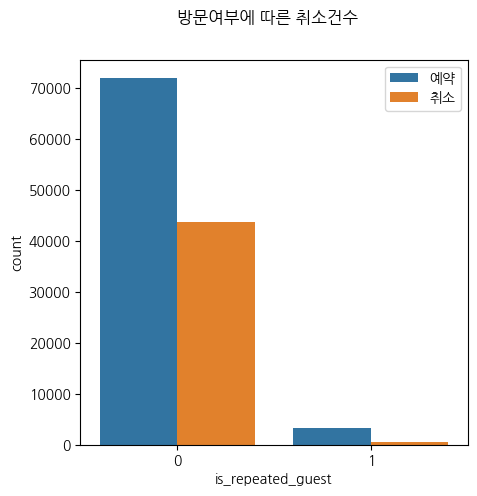

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.legend(labels=['예약','취소'])
plt.suptitle('방문여부에 따른 취소건수')
plt.show()
plt.show()

- 결과
    - 방문 경험이 없는 고객들이 그렇지 않은 고객들보다 취소건수가 많음
- 인사이트
    - 처음 예약한 사람들에게 특별할인이나, 특별시설 이용권 등 해택부여

---

# 3. 특정 국가에서 취소율이 높을 것이다

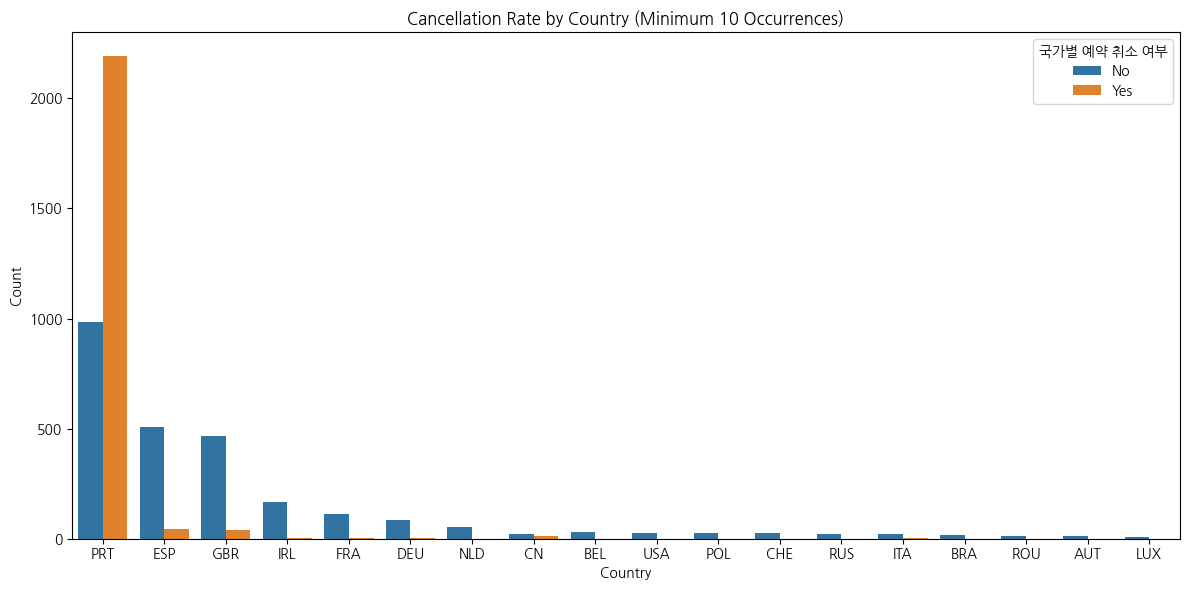

In [ ]:
# 나라컬럼의 5000개의 데이터만 추출
df_country = df.head(5000)

# 10개 이상 발생한 국가만 선택
country_counts = df_country['country'].value_counts()
selected_countries = country_counts[country_counts >= 10].index

# 선택된 국가에 대한 데이터만 필터링
filtered_df = df_country[df_country['country'].isin(selected_countries)]

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=filtered_df, x='country', hue='is_canceled', order=selected_countries)
plt.xticks()
plt.title('Cancellation Rate by Country (Minimum 10 Occurrences)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='국가별 예약 취소 여부', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- 결과
    - 포루투칼 고객에게 인기가 많은 호텔로 추청
    - 포루투칼 고객을 중심으로 호텔 예약이 이루어 지고 있음을 알 수 있다
    - 예약한 고객보다 고객 취소한 고객의 수가 더 많은 것을 확인 할 수 있다
- 인사이트
    - 포루투칼 고객을 중심으로 처음 온 고객이 이탈 수가 많을 것을 알 수 있음
    - 포루투칼 문화에 맞는 호텔 이벤트나 음식 준비을 준비

---

# 가설4. 연말 연초에 평소보다 예약이 많을 것이며, 그 만큼 취소건수도 높을 것이다

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ratio
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,9.0,0.0,0,0,0,Check-Out,2015-07-01,5
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,9.0,0.0,0,0,0,Check-Out,2015-07-01,5
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,9.0,0.0,0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,304.0,0.0,0,0,0,Check-Out,2015-07-02,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,240.0,0.0,0,0,1,Check-Out,2015-07-03,2


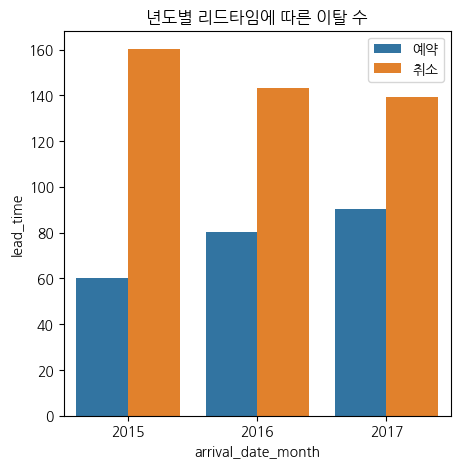

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df, x='arrival_date_year',y='lead_time', hue='is_canceled', errorbar=None)
plt.xlabel('arrival_date_month')
plt.ylabel('lead_time')
plt.title('년도별 리드타임에 따른 이탈 수')
plt.legend(labels=['예약','취소'])
plt.show()

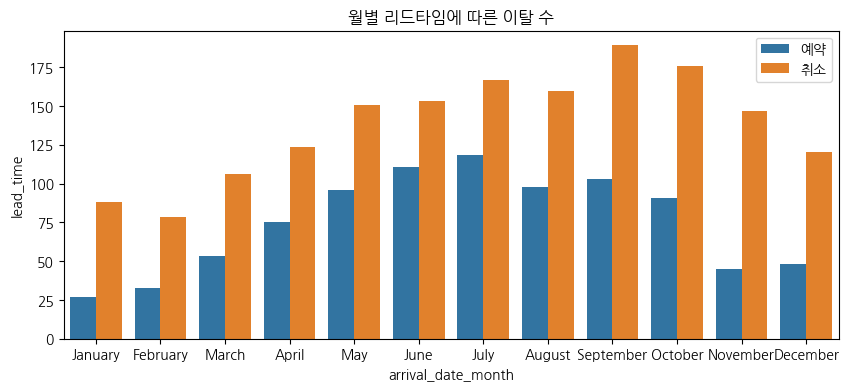

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

# 카테고리함수
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

sns.barplot(data=df, x='arrival_date_month', y='lead_time', hue='is_canceled', errorbar=None)

plt.xlabel('arrival_date_month')
plt.ylabel('lead_time')
plt.title('월별 리드타임에 따른 이탈 수')
plt.legend(labels=['예약','취소'])
plt.show()

In [ ]:
gp1 = df.groupby(['hotel', 'arrival_date_month'])['is_canceled'].agg(['count', 'sum'])
gp1['ratio'] = round((gp1['sum'] / gp1['count']) * 100, 2)
gp1

<ipython-input-202-1c52f7f79d13>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp1 = df.groupby(['hotel', 'arrival_date_month'])['is_canceled'].agg(['count', 'sum'])


count   sum  ratio
hotel        arrival_date_month                    
City Hotel   January              3736  1482  39.67
             February             4965  1901  38.29
             March                6458  2386  36.95
             April                7480  3465  46.32
             May                  8232  3653  44.38
             June                 7894  3528  44.69
             July                 8088  3306  40.88
             August               8983  3602  40.10
             September            7400  3110  42.03
             October              7605  3268  42.97
             November             4357  1661  38.12
             December             4132  1740  42.11
Resort Hotel January              2193   325  14.82
             February             3103   795  25.62
             March                3336   763  22.87
             April                3609  1059  29.34
             May                  3559  1024  28.77
             June                 3045  1007  33.07
             July                 4573  1436  31.40
             August               4894  1637  33.45
             September            3108  1006  32.37
             October              3555   978  27.51
             November             2437   461  18.92
             December             2648   631  23.83

- 결과
    - 년도별, 월별 모두 예약건수보다 취소건수가 높은 것을 알 수 있음
    - 그리고 주 고객은 포루투칼 고객으로 확인
    - 상대적으로 월 말에 취소건수가 더 많은 것을 확인
- 인사이트
    - 월말 이벤트 추친
    - 핵심은 리드타임이 길어질수록 취소율은 높음
    - 리드타임이 긴 고객을 식별 및 예약 호텔조건을 분석하여 필요한 부분들 추가 혜택 증정

In [ ]:
df.to_csv('hotel.csv')